In [54]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
data_path = os.path.join("/", "data", "km3net")

In [3]:
reco_path = os.path.join(data_path, "reco_files_fitinf")

In [4]:
multi_data_path = os.path.join(data_path, "Xy_multi_data_files")

In [5]:
numu_filep = "km3_v4_numuCC_{}.evt.reco_fitinf.npz"

In [6]:
reco_files_fitinf_numu = [os.path.join(reco_path, numu_filep.format(i + 1)) for i in range(100)]

In [7]:
from data_files import get_multi_data_files, get_doms_maps

In [8]:
true_data = get_multi_data_files(multi_data_path, merge=False, n_files=100)[0]

In [9]:
np.load(true_data[0]).keys()

['E', 'dirz', 'diry', 'dirx', 'posz', 'posx', 'posy', 'y', 'x', 'dist']

In [10]:
doms_map_files_numu = get_doms_maps(multi_data_path, merge=False, n_files=100)[0]

In [11]:
doms_map_files_numu[0]

'/data/km3net/Xy_multi_data_files/numu_1_sel5_doms_map.npz'

In [12]:
lik = [np.load(reco_files_fitinf_numu[i])["lik"][np.load(doms_map_files_numu[i])["id"]] for i in range(100)]
beta = [np.load(reco_files_fitinf_numu[i])["beta0"][np.load(doms_map_files_numu[i])["id"]] for i in range(100)]

In [13]:
lik[0].shape

(1472,)

In [14]:
beta[0].shape

(1472,)

In [15]:
reco_numu_cosz = [np.load(reco_files_fitinf_numu[i])["dirz"] for i in range(100)] 

In [16]:
true_numu_cosz = [np.load(true_data[i])["dirz"] for i in range(100)]

In [17]:
reco_numu_cosz[0].shape

(1545,)

In [18]:
true_numu_cosz[0].shape

(1472,)

In [19]:
reco_numu_cosz_5doms = [reco_numu_cosz[i][np.load(doms_map_files_numu[i])["id"]] for i in range(100)]

In [20]:
nonzero = [np.where(reco_numu_cosz_5doms[i]!=0) for i in range(100)]

In [21]:
reco_numu_cosz_5doms[0].shape

(1472,)

In [22]:
reco_numu_cosz_nonzero = [reco_numu_cosz_5doms[i][nonzero[i]] for i in range(100)]

In [23]:
reco_numu_cosz_nonzero[0].shape

(1456,)

In [24]:
true_numu_cosz_nonzero = [true_numu_cosz[i][nonzero[i]] for i in range(100)]

In [25]:
best_reco_indices = [np.where(np.logical_and(lik[i]<-0, np.log10(beta[i])<-2.8 ))[0] for i in range(100)]

/home/cdesio/anaconda3/envs/intel/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [26]:
best_reco_indices[0].shape

(704,)

In [27]:
best_reco_cosz = [reco_numu_cosz_5doms[i][best_reco_indices[i]] for i in range(100)]

In [28]:
best_true_numu_cosz = [true_numu_cosz[i][best_reco_indices[i]] for i in range(100)]

In [29]:
best_reco_cosz[0].shape

(704,)

In [30]:
best_true_numu_cosz[0].shape

(704,)

In [154]:
true = true_numu_cosz_nonzero
reco = reco_numu_cosz_nonzero

In [31]:
true = best_true_numu_cosz
reco = best_reco_cosz

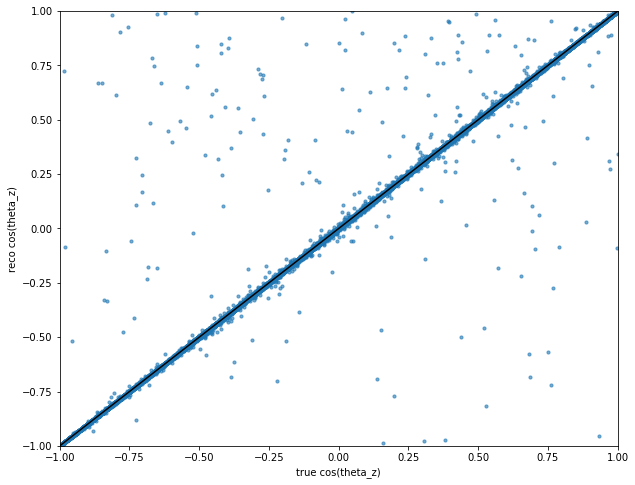

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(np.hstack(true), np.hstack(reco),
            alpha=0.6,s=10)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.plot([-1,1], [-1,1], c="k")
plt.xlabel("true cos(theta_z)")
plt.ylabel("reco cos(theta_z)")
plt.show()

In [166]:
np.savetxt("utilities/true_numu_cosz_nocuts.txt", true_cosz)
np.savetxt("utilities/reco_numu_cosz_nocuts.txt", reco_cosz)

In [32]:
true_cosz = np.hstack(true_numu_cosz)
reco_cosz = np.hstack(reco_numu_cosz_5doms)

In [156]:
true_cosz = np.hstack(true_numu_cosz_nonzero)
reco_cosz = np.hstack(reco_numu_cosz_nonzero)

In [167]:
true_cosz.shape

(149706,)

In [33]:
true_cosz = np.hstack(best_true_numu_cosz)

In [34]:
reco_cosz = np.hstack(best_reco_cosz)

In [35]:
np.savetxt("utilities/true_numu_cosz_cuts.txt", true_cosz)
np.savetxt("utilities/reco_numu_cosz_cuts.txt", reco_cosz)

In [36]:
true_cosz.shape

(71241,)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
print(mean_squared_error(true_cosz, reco_cosz))
print(r2_score(true_cosz, reco_cosz))


0.00164857827761
0.993787587846


In [39]:
def process_cosz(y):
    y_p = np.copy(y)
    y_p[y_p>0] = 1
    y_p[y_p<=0] = 0
    return y_p

In [40]:
true_cosz_lab = process_cosz(true_cosz)

In [41]:
reco_cosz_lab = process_cosz(reco_cosz)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [43]:
accuracy_score(true_cosz_lab, reco_cosz_lab)

0.99806291321008966

In [44]:
cosz_true_reco = [(ct, cr) for ct,cr in zip(true_cosz, reco_cosz)]
cosz_reco_true = [(cr, ct) for ct,cr in zip(true_cosz, reco_cosz)]

#en_true_reco_corr = [(np.log10(et), np.log10(er)) for et,er in zip(true_E, corr_reco_E) if er > 0]
#en_reco_true_corr = [(np.log10(er), np.log10(et)) for et,er in zip(true_E, corr_reco_E) if er > 0]

In [45]:
def binbounds(lsval, binmin, binmax, clev):
    odata = [(x[1]-x[0]) for x in lsval if binmin <= x[0] < binmax]
    excluded = int(np.floor((1.0 - clev) * len(odata) * 0.5))
    odata.sort()    
    return (0.5*(binmax+binmin),odata[excluded],odata[-excluded])

In [47]:
def plot_performances(values_list, range_ext_1, range_ext_2, coeff = 0.5,  xlabel="True cos(theta_z)", ylabel="Estimated cos(theta_z)"):
    plt.figure(figsize=(9,7))
    cl_68_nn = [binbounds(values_list,x*coeff,(x+1)*coeff,0.68) for x in range(range_ext_1,range_ext_2)]
    cl_90_nn = [binbounds(values_list,x*coeff,(x+1)*coeff,0.90) for x in range(range_ext_1,range_ext_2)]
    median_nn = [binbounds(values_list,x*coeff,(x+1)*coeff,0) for x in range(range_ext_1,range_ext_2)]

    line_68_1 = plt.plot([x[0] for x in cl_68_nn],[x[1]+x[0] for x in cl_68_nn],"steelblue", label="68% confidence level", alpha=1)
    line_68_2 = plt.plot([x[0] for x in cl_68_nn],[x[2]+x[0] for x in cl_68_nn],"steelblue", alpha=1)
    line_90_1 = plt.plot([x[0] for x in cl_90_nn],[x[1]+x[0] for x in cl_90_nn],"lightslategray", label="90% confidence level",alpha=1)
    line_90_2 = plt.plot([x[0] for x in cl_90_nn],[x[2]+x[0] for x in cl_90_nn],"lightslategray",alpha=1)
    median = plt.plot([x[0] for x in median_nn],[x[2]+x[0] for x in median_nn],"k", label="median")
    regr_line = plt.plot([-1,1],[-1,1],"r", label='true', lw=1)

    plt.fill_between([x[0] for x in cl_68_nn], [x[1]+x[0] for x in cl_68_nn], [x[2]+x[0] for x in cl_68_nn],
                color='cornflowerblue',alpha=0.7)
    plt.fill_between([x[0] for x in cl_90_nn], [x[1]+x[0] for x in cl_90_nn], [x[2]+x[0] for x in cl_90_nn],
                color='lightsteelblue',alpha=0.7)


    #plt.scatter([x[0] for x in values_list], [x[1] for x in values_list], s=1, 
    #            marker='o', color='black', edgecolor='k', alpha=0.2)
    plt.minorticks_on()
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.legend(loc="lower right")
    plt.grid(b=True, which='both', color='0.65', linestyle='--')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    return

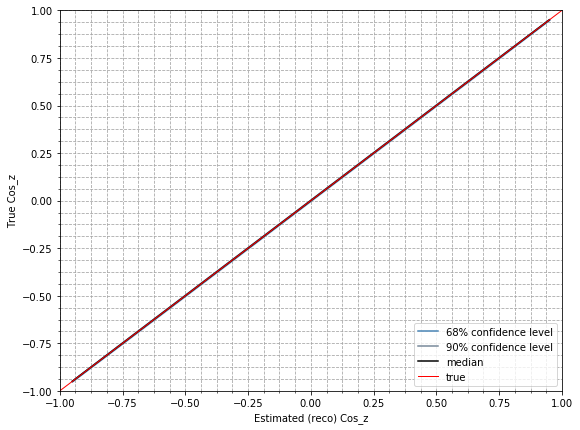

In [48]:
plot_performances(cosz_true_reco, -10,10, coeff=0.1, xlabel="Estimated (reco) Cos_z", ylabel="True Cos_z")

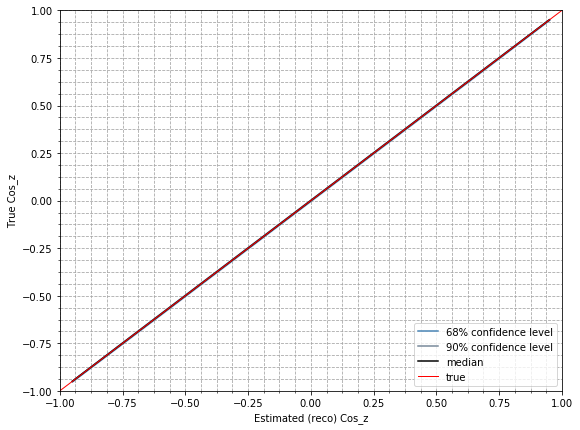

In [49]:
plot_performances(cosz_reco_true, -10,10, coeff=0.1, 
                  xlabel="Estimated (reco) Cos_z", ylabel="True Cos_z")

### now let's check the NN performances on the best_events

In [39]:
import keras
import keras.backend as K

In [40]:
def get_TZ_data(X):
    TZ = np.sum(X, axis=(2, 3))
    if K.image_data_format() == "channels_first":
        TZ = TZ[:, np.newaxis, ...]
    else:
        TZ = TZ[..., np.newaxis]
    return [TZ]

In [41]:
# %load data_loaders
from math import ceil
import numpy as np
import pandas as pd
from collections import OrderedDict
from keras.engine.topology import _to_list
from keras.utils import to_categorical
from numpy import concatenate as concat
from sklearn.utils.class_weight import compute_class_weight
from export_train_test import (INDEX_TRAINING_KEY, INDEX_TEST_KEY, INDEX_VALIDATION_KEY)


def data_generator(fnames, indices_list, batch_size=64, fdata=lambda X: X, ftarget=lambda y: to_categorical(y)):

    while True:
        file_idx = 0
        X_buff = Y_buff = None
        residual = False
        while file_idx < len(fnames):
            fname = fnames[file_idx]
            Xy = np.load(fname)
            X, y = Xy['x'], Xy['dirz']
            X_best = X[indices_list[file_idx]]
            Y = ftarget(y[indices_list[file_idx]])
            X = _to_list(fdata(X_best))  # X will be finally a list
            idx = 0  # batch current file
            while idx < Y.shape[0]:
                if residual:  # i.e. there are samples stored from previous iteration
                    incr = (batch_size - X_buff[0].shape[0])
                else:
                    incr = batch_size

                start, end = idx, idx + incr

                if end > Y.shape[0]:  # current file is completed
                    if X_buff is None:
                        X_buff, Y_buff = [X_in[start:] for X_in in X], Y[start:]
                    else:
                        X_buff = [concat((X_in_buff, X_in[start:])) for X_in_buff, X_in in zip(X_buff, X)]
                        Y_buff = concat((Y_buff, Y[start:]))
                    residual = True
                    break
                X_batch, Y_batch = [X_in[start:end] for X_in in X], Y[start:end]
                if residual:
                    X_batch = [concat((X_in_buff, X_in_batch)) for X_in_buff, X_in_batch in zip(X_buff, X_batch)]
                    Y_batch = concat((Y_buff, Y_batch))
                else:
                    X_buff = Y_buff = None

                yield X_batch, Y_batch
                idx += incr
                residual = False
            file_idx += 1
        else:
            if residual:
                yield X_buff, Y_buff


In [42]:
numu_gen = data_generator(true_data, indices_list=best_reco_indices, batch_size=64, fdata=get_TZ_data , ftarget=lambda y: y)

NameError: name 'best_reco_indices' is not defined

In [43]:
# %load data_loaders
from math import ceil
import numpy as np
import pandas as pd
from collections import OrderedDict
from keras.engine.topology import _to_list
from keras.utils import to_categorical
from numpy import concatenate as concat
from sklearn.utils.class_weight import compute_class_weight
from export_train_test import (INDEX_TRAINING_KEY, INDEX_TEST_KEY, INDEX_VALIDATION_KEY)


def get_n_iterations(fnames_list, indices_list, target_key="y", batch_size=64):
    """
    Function to get the number of iterations required to
    process the total set of samples extracted from the list
    of data files in input.

    Parameters
    ----------
    fnames_list: list
        List of data files to read from. Expected file format is Numpy/Compressed
        as created from `numpy.savez_compressed`.

    target_key: str (default "y")
        The key in the file to be used to calculate the number of samples

    batch_size: int (default 64)
        The size of the batch that is expected to be used in the training process.

    Returns
    -------
        int, int: total number of iterations and total number of events
        extracted from list of input files.
    """
    tot_events = 0
    for i, fil in enumerate(fnames_list):
        yf = np.load(fil)[target_key]
        ybest = yf[indices_list[i]]
        yf=ybest
        tot_events += yf.shape[0]
    iterations = int(ceil(tot_events / float(batch_size)))
    return iterations, tot_events


In [44]:
predict_steps, tot_test_events = get_n_iterations(true_data, nonzero, "dirz", batch_size=64)
print(predict_steps, tot_test_events)

2340 149706


In [45]:
from tqdm import tqdm

In [53]:
from network_models import TZnet_regression_cosz

In [54]:
model = TZnet_regression_cosz()
model.load_weights('./model_no_git/tz_net_regression_64_100_regression_cosz.hdf5')

In [55]:
from keras import backend as K
from keras.utils import to_categorical

In [56]:
y_true = list()
y_pred = list()
for _ in tqdm(range(predict_steps)):
    X_batch, Y_batch_true = next(numu_gen)
    Y_batch_pred = model.predict_on_batch(X_batch)
    y_true.append(Y_batch_true)
    y_pred.append(Y_batch_pred.ravel())

y_true = np.hstack(np.asarray(y_true))
y_pred = np.hstack(np.asarray(y_pred))

100%|██████████| 1114/1114 [07:34<00:00,  2.45it/s]


In [61]:
y_true.shape

(71241,)

In [179]:
np.savetxt("utilities/cosz_numu_nocuts_predicted.txt", y_pred)
np.savetxt("utilities/cosz_numu_nocuts_true.txt", y_true)

In [57]:
np.savetxt("utilities/cosz_numu_cuts_true.txt", y_true)
np.savetxt("utilities/cosz_numu_cuts_predicted.txt", y_true)

In [58]:
mean_squared_error(y_true, y_pred)

0.0025354410504981758

In [59]:
r2_score(y_true, y_pred)

0.99044558271057004

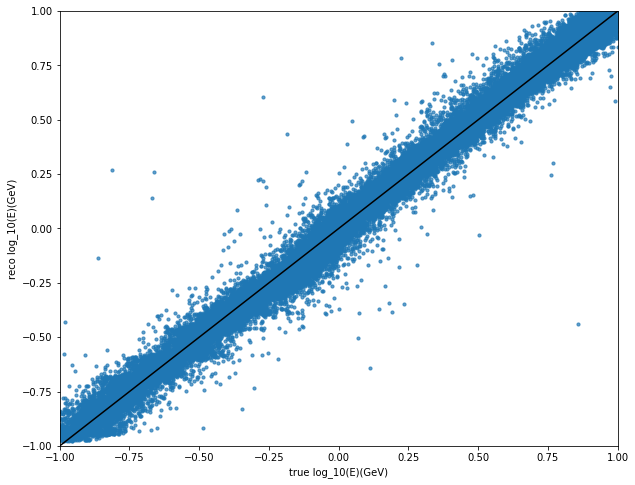

In [60]:
plt.figure(figsize=(10,8))
plt.scatter(y_true, y_pred,
            alpha=0.7,s=10)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.plot([-1,1], [-1,1], c="k")
plt.xlabel("true log_10(E)(GeV)")
plt.ylabel("reco log_10(E)(GeV)")
plt.show()

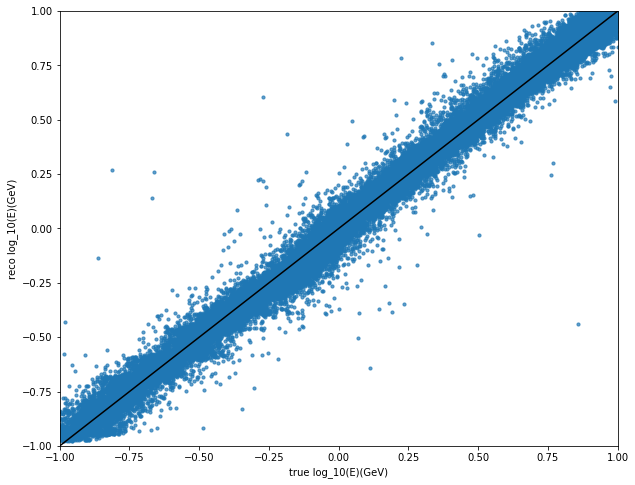

In [120]:
plt.figure(figsize=(10,8))
plt.scatter(y_true, y_pred,
            alpha=0.7,s=10)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.plot([-1,1], [-1,1], c="k")
plt.xlabel("true log_10(E)(GeV)")
plt.ylabel("reco log_10(E)(GeV)")
plt.show()

In [66]:
cosz_true_nn = [(et, en) for et,en in zip(y_true, y_pred)]
cosz_nn_true = [(en, et) for et, en in zip(y_true, y_pred) ]

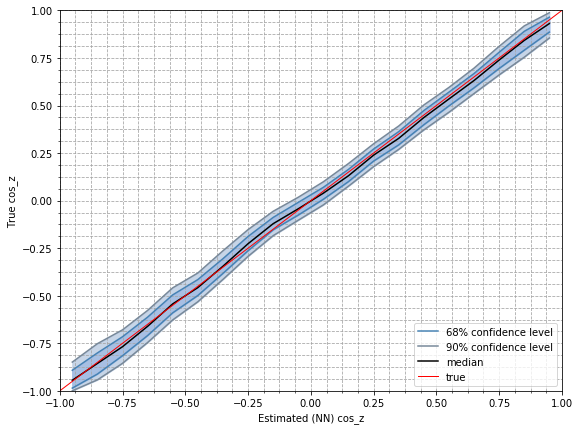

In [67]:
plot_performances(cosz_nn_true, -10, 10, coeff=0.1, 
                  xlabel="Estimated (NN) cos_z", 
                  ylabel="True cos_z")

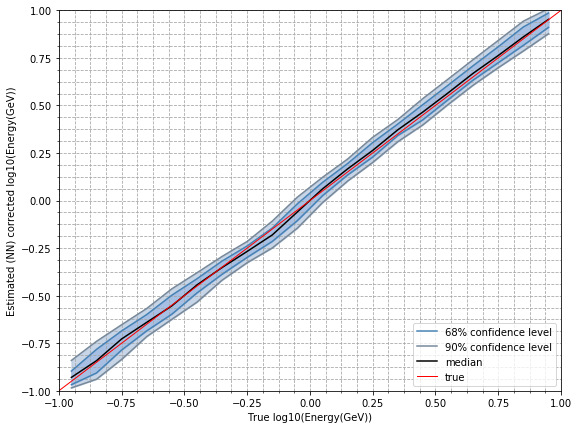

In [68]:
plot_performances(cosz_true_nn, -10, 10, coeff=0.1, 
                  ylabel="Estimated (NN) corrected log10(Energy(GeV))", 
                  xlabel="True log10(Energy(GeV))")

In [69]:
print(mean_squared_error(y_true, y_pred))
print(r2_score(y_true, y_pred))

0.0025354410505
0.990445582711


In [72]:
np.hstack(best_true_numu_cosz)[:10]

array([ 0.208183, -0.020776, -0.548133, -0.098729, -0.011285,  0.640216,
        0.927204,  0.305527,  0.083693,  0.020848])

In [73]:
y_true[:10]

array([ 0.208183, -0.020776, -0.548133, -0.098729, -0.011285,  0.640216,
        0.927204,  0.305527,  0.083693,  0.020848])

In [46]:
from network_models import TZ_updown_classification

In [47]:
model = TZ_updown_classification(2)

In [48]:
vgg_tz_net = keras.models.load_model("models/vgg_tz_updown_cosz_cls_weighted_100files_64_12x12_100epochs.hdf5")

In [49]:
# %load data_loaders
from math import ceil
import numpy as np
import pandas as pd
from collections import OrderedDict
from keras.engine.topology import _to_list
from keras.utils import to_categorical
from numpy import concatenate as concat
from sklearn.utils.class_weight import compute_class_weight
from export_train_test import (INDEX_TRAINING_KEY, INDEX_TEST_KEY, INDEX_VALIDATION_KEY)


def data_generator(fnames, indices_list, batch_size=64, fdata=lambda X: X, ftarget=lambda y: to_categorical(y)):

    while True:
        file_idx = 0
        X_buff = Y_buff = None
        residual = False
        while file_idx < len(fnames):
            fname = fnames[file_idx]
            Xy = np.load(fname)
            X, y = Xy['x'], Xy['dirz']
            X_best = X[indices_list[file_idx]]
            Y = ftarget(y[indices_list[file_idx]])
            X = _to_list(fdata(X_best))  # X will be finally a list
            idx = 0  # batch current file
            while idx < Y.shape[0]:
                if residual:  # i.e. there are samples stored from previous iteration
                    incr = (batch_size - X_buff[0].shape[0])
                else:
                    incr = batch_size

                start, end = idx, idx + incr

                if end > Y.shape[0]:  # current file is completed
                    if X_buff is None:
                        X_buff, Y_buff = [X_in[start:] for X_in in X], Y[start:]
                    else:
                        X_buff = [concat((X_in_buff, X_in[start:])) for X_in_buff, X_in in zip(X_buff, X)]
                        Y_buff = concat((Y_buff, Y[start:]))
                    residual = True
                    break
                X_batch, Y_batch = [X_in[start:end] for X_in in X], Y[start:end]
                if residual:
                    X_batch = [concat((X_in_buff, X_in_batch)) for X_in_buff, X_in_batch in zip(X_buff, X_batch)]
                    Y_batch = concat((Y_buff, Y_batch))
                else:
                    X_buff = Y_buff = None

                yield X_batch, Y_batch
                idx += incr
                residual = False
            file_idx += 1
        else:
            if residual:
                yield X_buff, Y_buff



In [50]:
def get_TZ_data(X):
    TZ = np.sum(X, axis=(2, 3))
    TZ = TZ[:, np.newaxis, ...]
    return [TZ]
def process_cos_Z(y):
    y[y>0]=1
    y[y<=0]=0
    return to_categorical(y)

In [51]:
numu_gen = data_generator(true_data, indices_list=nonzero, batch_size=64, fdata=get_TZ_data, 
                          ftarget=process_cos_Z)

In [55]:
y_true_upd = list()
y_pred_upd = list()
y_probs = None
for _ in tqdm(range(predict_steps)):
    X_batch, Y_batch_true = next(numu_gen)
    Y_batch_pred = vgg_tz_net.predict_on_batch(X_batch)
    if y_probs is None:
        y_probs = Y_batch_pred
    else:
        y_probs = np.vstack((y_probs, Y_batch_pred))

    y_true_upd.append(np.argmax(Y_batch_true, axis=1))
    y_pred_upd.append(np.argmax(Y_batch_pred, axis=1))

y_true_upd = np.hstack(np.asarray(y_true_upd))
y_pred_upd = np.hstack(np.asarray(y_pred_upd))

100%|██████████| 2340/2340 [10:49<00:00,  3.60it/s]


In [58]:
np.savetxt("utilities/updown_nocuts_true.txt", y_true_upd)

In [56]:
np.savetxt("utilities/updown_nocuts_true.txt", y_true_upd)
np.savetxt("utilities/updown_nocuts_predicted.txt", y_pred_upd)
np.savetxt("utilities/updown_nocuts_probs.txt", y_probs)

In [68]:
np.savetxt("utilities/updown_cuts_true.txt", y_true_upd)
np.savetxt("utilities/updown_cuts_predicted.txt", y_pred_upd)
np.savetxt("utilities/updown_cuts_probs.txt", y_probs)

In [69]:
y_pred_upd

array([1, 0, 0, ..., 0, 0, 1])

In [70]:
y_pred_upd.shape

(71241,)

In [71]:
accuracy_score(y_true_upd, y_pred_upd)

0.98708608806726461

In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
confusion_matrix(y_true_upd, y_pred_upd)

array([[29965,   480],
       [  440, 40356]])

[[29965   480]
 [  440 40356]]


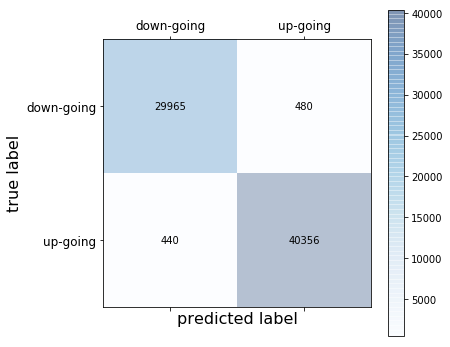

In [74]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true_upd, y_pred_upd)
print(confmat)

import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label',size=16)
plt.ylabel('true label',size=16)
ax.set_xticklabels([''] + ["down-going", "up-going"], size=12)
ax.set_yticklabels([''] + ["down-going", "up-going"], size=12)
fig.colorbar(cax)
plt.show()


In [194]:
from sklearn.metrics import precision_score, precision_recall_curve, recall_score, average_precision_score, f1_score

In [195]:
precision_score(y_true_upd, y_pred_upd)

0.9773748735204838

In [196]:
recall_score(y_true_upd, y_pred_upd)

0.97596249867828988

In [197]:
f1_score(y_true_upd, y_pred_upd)

0.9766681754854184

In [198]:
average_precision = average_precision_score(y_true_upd, y_pred_upd)

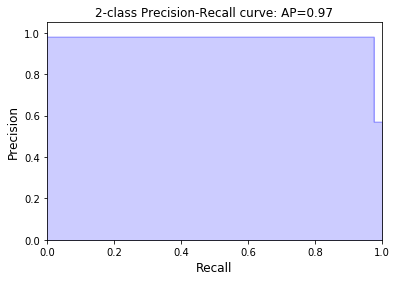

In [199]:
precision, recall, _ = precision_recall_curve(y_true_upd, y_pred_upd)
plt.step(recall, precision, color="b", alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel("Recall", size=12)
plt.ylabel("Precision", size=12)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title("2-class Precision-Recall curve: AP={0:0.2f}".format(average_precision))

plt.show()

In [200]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from keras.utils import to_categorical

In [203]:
n_classes = 2
fpr = dict()
tpr=dict()
roc_auc=dict()
Y_true = to_categorical(y_true_upd)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_true[:,i], to_categorical(y_pred_upd)[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_upd, y_pred_upd)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

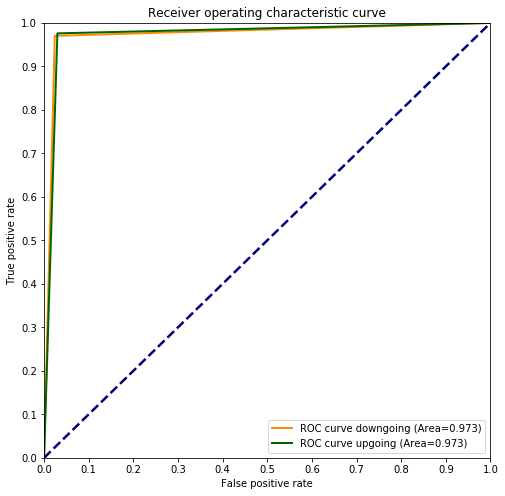

In [204]:
plt.figure(figsize=(8, 8))
lw = 2
plt.plot(fpr[0], tpr[0], color="darkorange",
         lw=lw, label="ROC curve downgoing (Area=%0.3f)" % roc_auc[0])
plt.plot(fpr[1], tpr[1], color="darkgreen",
         lw=lw, label="ROC curve upgoing (Area=%0.3f)" % roc_auc[1])

plt.plot([0,1],[0,1], color="navy", lw=2.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.yticks(np.arange(0,1.1,0.1))
plt.xticks(np.arange(0,1.1,0.1))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating characteristic curve")
plt.legend(loc="lower right")
plt.show()



In [75]:
true_numu_Energy = [np.load(true_data[i])["E"] for i in range(100)]
true_numu_dist = [np.load(true_data[i])["dist"] for i in range(100)]

In [76]:
sel_E = np.hstack([true_numu_Energy[i][nonzero[i]] for i in range(100)])

In [77]:
sel_dist = np.hstack([true_numu_dist[i][nonzero[i]] for i in range(100)])

In [79]:
sel_E = np.hstack([true_numu_Energy[i][best_reco_indices[i]] for i in range(100)])


sel_dist = np.hstack([true_numu_dist[i][best_reco_indices[i]] for i in range(100)])



In [80]:
np.savetxt("utilities/energy_numu_cuts.txt", sel_E)
np.savetxt("utilities/dist_numu_cuts.txt", sel_dist)

In [208]:
sel_E.shape

(149706,)

In [209]:
def energy_maps(energies, nbins = 5):
    
    log_energies = np.log10(energies)
    
    E_maps = []
    binned, energy_bins = np.histogram(log_energies,bins=[log_energies.min(), 2.5, 3, 4, 5.5, log_energies.max() ])#, 
                                  #range=(log_energies.min(), log_energies.max()))

    for i, E in enumerate(zip(energy_bins[:-1], energy_bins[1:])):
        lowE, highE = E
        E_maps.append((i, np.where(np.logical_and(log_energies>=lowE, log_energies<highE))[0]))
    
    return E_maps, energy_bins

In [210]:
E_maps, E_bins = energy_maps(sel_E)

In [227]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from keras.utils import to_categorical


def roc_function(E_map_list, E_bins, y_true, y_pred, probs, var, y_n_classes = 2):
    Y_true = to_categorical(y_true)
    n_classes = 2
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    plt.figure(figsize=(10, 7))
    plt.grid()
    color_list = ["red", "blue", "green", "orange", "magenta", "brown", "black"]
    
    for em in range(len(E_map_list)):
        E_map = E_map_list[em][1]
    
        for i, ls in zip(range(n_classes-1), ['-', '--']):
            fpr[i], tpr[i], _ = roc_curve(Y_true[E_map][:,i], probs[E_map][:,i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            lw = 1.5
            
            plt.plot(fpr[i], tpr[i], color=color_list[em], linestyle=ls,
                     lw=lw, label="ROC curve {} E_bin:[{:.1f},{:.1f}] class {} (Area={:.3f})".format(var, E_bins[em], 
                                                                                                      E_bins[em+1], 
                                                                                                  i, roc_auc[i]))
            
            plt.plot([0,1],[0,1], color="navy", lw=lw, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.01])
            plt.xlabel("False positive rate", size=12)
            plt.ylabel("True positive rate", size=12)
            plt.title("Receiver operating characteristic curve")
            plt.legend(loc="lower right")
            
        
        fpr["micro"], tpr["micro"], _ = roc_curve(y_true[E_map], y_pred[E_map])
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
 
    return

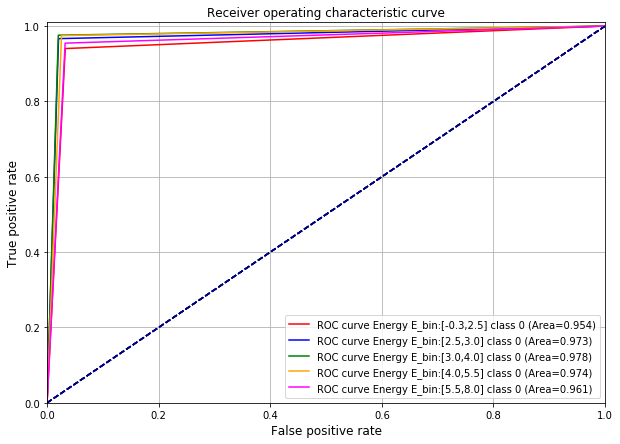

In [212]:
roc_function(E_maps, E_bins, y_true_upd, y_pred_upd, to_categorical(y_pred_upd), "Energy" )
plt.show()

In [213]:
def distance_maps(distances, nbins = 5):
    
    d_maps = []
    binned, dist_bins = np.histogram(distances,bins=[6.13e-01, 170, 320, 450, 500, 8.106e+02])#, 
                                  #range=(log_energies.min(), log_energies.max()))
    for i, d in enumerate(zip(dist_bins[:-1],dist_bins[1:])):
        lowd, highd = d
        d_maps.append((i, np.where(np.logical_and(distances>=lowd, distances<highd))[0]))
    return d_maps, dist_bins

In [ ]:
d_maps, d_bins = distance_maps(sel_dist)

In [229]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from keras.utils import to_categorical


def roc_function(E_map_list, E_bins, y_true, y_pred, probs, var, y_n_classes = 2):
    Y_true = to_categorical(y_true)
    n_classes = 2
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    plt.figure(figsize=(10, 7))
    plt.grid()
    color_list = ["red", "blue", "green", "orange", "magenta", "brown", "black"]
    
    for em in range(len(E_map_list)):
        E_map = E_map_list[em][1]
    
        for i, ls in zip(range(n_classes-1), ['-', '--']):
            fpr[i], tpr[i], _ = roc_curve(Y_true[E_map][:,i], probs[E_map][:,i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            lw = 1.5
            
            plt.plot(fpr[i], tpr[i], color=color_list[em], linestyle=ls,
                     lw=lw, label="ROC curve {} d_bin:[{},{}] class {} (Area={:.3f})".format(var, E_bins[em], 
                                                                                                      E_bins[em+1], 
                                                                                                  i, roc_auc[i]))
            
            plt.plot([0,1],[0,1], color="navy", lw=lw, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.01])
            plt.xlabel("False positive rate", size=12)
            plt.ylabel("True positive rate", size=12)
            plt.title("Receiver operating characteristic curve")
            plt.legend(loc="lower right")
            
        
        fpr["micro"], tpr["micro"], _ = roc_curve(y_true[E_map], y_pred[E_map])
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
 
    return



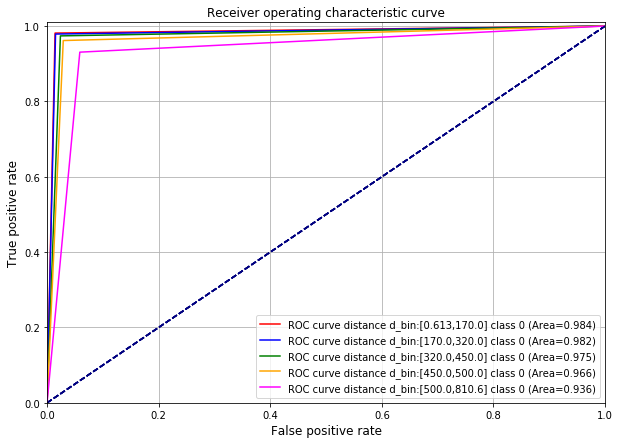

In [220]:
roc_function(d_maps, d_bins, y_true_upd, y_pred_upd, to_categorical(y_pred_upd), "distance" )
plt.show()

In [221]:
accuracy_score(true_cosz_lab, reco_cosz_lab)

0.97210532643982206

[[30362    83]
 [   55 40741]]


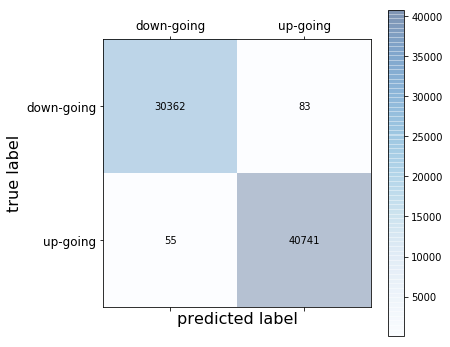

In [113]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(true_cosz_lab, reco_cosz_lab)
print(confmat)

import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label',size=16)
plt.ylabel('true label',size=16)
ax.set_xticklabels([''] + ["down-going", "up-going"], size=12)
ax.set_yticklabels([''] + ["down-going", "up-going"], size=12)
fig.colorbar(cax)
plt.show()



In [222]:
n_classes = 2
fpr = dict()
tpr=dict()
roc_auc=dict()
Y_true = to_categorical(true_cosz_lab)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_true[:,i], to_categorical(reco_cosz_lab)[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(true_cosz_lab, reco_cosz_lab)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

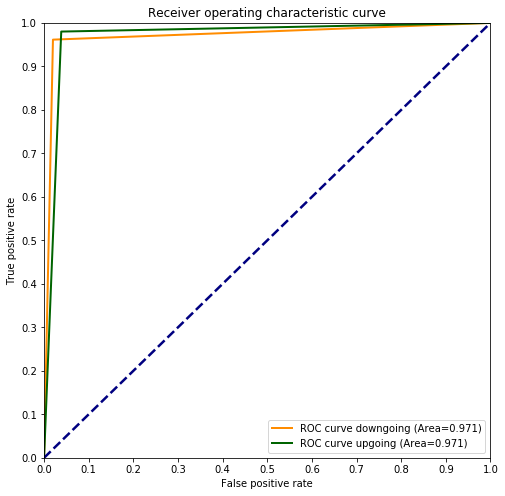

In [224]:
plt.figure(figsize=(8, 8))
lw = 2
plt.plot(fpr[0], tpr[0], color="darkorange",
         lw=lw, label="ROC curve downgoing (Area=%0.3f)" % roc_auc[0])
plt.plot(fpr[1], tpr[1], color="darkgreen",
         lw=lw, label="ROC curve upgoing (Area=%0.3f)" % roc_auc[1])

plt.plot([0,1],[0,1], color="navy", lw=2.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.yticks(np.arange(0,1.1,0.1))
plt.xticks(np.arange(0,1.1,0.1))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating characteristic curve")
plt.legend(loc="lower right")
plt.show()




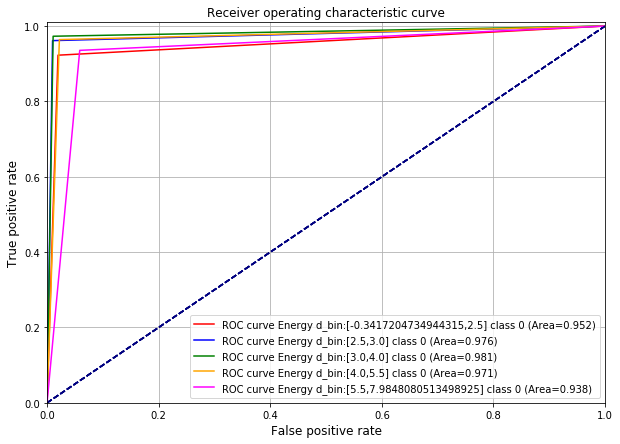

In [234]:
roc_function(E_maps, E_bins, y_true_upd, reco_cosz_lab, to_categorical(reco_cosz_lab), "Energy" )
plt.show()

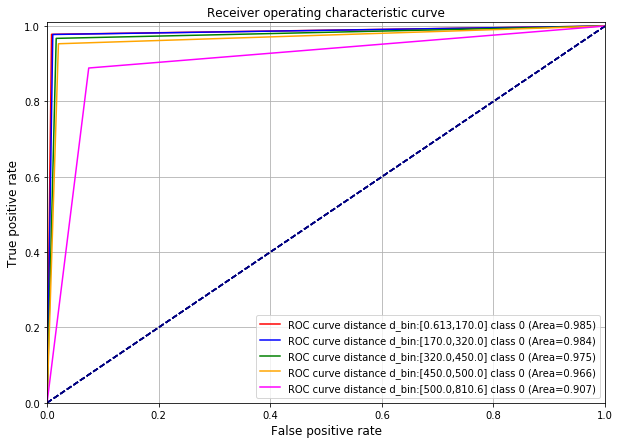

In [233]:
roc_function(d_maps, d_bins, y_true_upd, reco_cosz_lab, to_categorical(reco_cosz_lab), "distance" )
plt.show()